In [ ]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=92d5b9e79990e46f55810ff69e7cbdfcb22fd6d159cf4925bb0c153592c5f49b
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X = np.array([[1],[2],[3],[4],[5],[6]])
#X = np.array([[1,2,3,4,5,6]]).reshape(-1,1)でもよい。
y = np.array([3.1, 5.1, 6.8, 8.9, 11.5, 13.8])

model = LinearRegression()
model.fit(X, y)
print(model.coef_)             # coef は 傾き
print(model.intercept_)        # intercept は 切片
print(model.predict([[8.0]]))  # 8日後の背丈を予測する。

[2.13714286]
0.7199999999999989
[17.81714286]


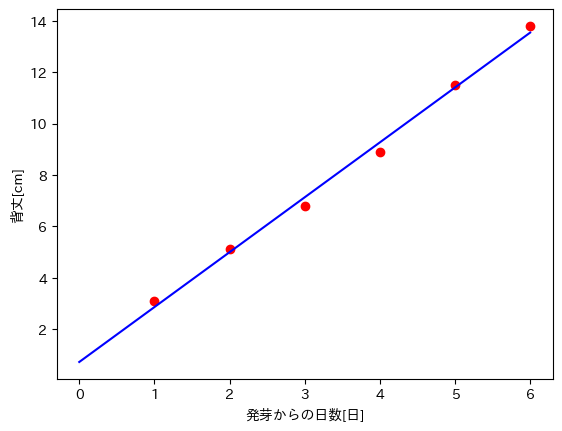

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

X_line = np.linspace(0, 6, 100)
y_line = model.coef_[0] * X_line + model.intercept_    # y = ax+b

plt.plot(X_line, y_line, c = "b")
plt.scatter(X, y, c = "r")
plt.xlabel("発芽からの日数[日]")
plt.ylabel("背丈[cm]")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

X = np.array([[14, 35], [2, 46], [6, 7], [14, 27], [3, 54], [15, 60]])
y = np.array([609.6, 836.6, 150, 467.2, 976.4, 1000])
model = LinearRegression()
model.fit(X, y)
print(model.coef_)  # 係数a1, a2
print(model.intercept_) # 定数項b
print(model.predict([[8, 35.5]]))

[-4.6184659 16.9079543]
69.54593753023687
[632.83058778]


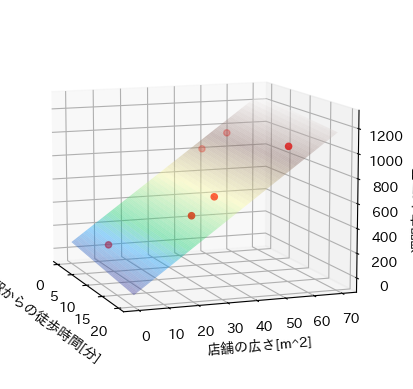

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

X = np.array([[14, 35], [2, 46], [6, 7], [14, 27], [3, 54], [15, 60]])
y = np.array([609.6, 836.6, 132, 467.2, 976.4, 1000])

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

ax1.scatter(X[:, 0], X[:, 1], y, color='red')

ax1.set_xlabel("駅からの徒歩時間[分]")
ax1.set_ylabel("店舗の広さ[m^2]")
ax1.set_zlabel('週間売上[万円]')

ax1.view_init(elev=10, azim=-20)
#view.initは視点の位置。elev(エレベーション)は仰角(高さ)、azim(アジマス)は方位角。

x1 = np.linspace(0, 20, 100)
x2 = np.linspace(0, 70, 100)
#x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)#でも良いかな。
#x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)#でも良いかな。

# 網目を作る
x1_grid, x2_grid = np.meshgrid(x1, x2)

z = model.coef_[0] * x1_grid + model.coef_[1] * x2_grid + model.intercept_

# 平面を書くとき
ax1.plot_surface(x1_grid, x2_grid, z, cmap='terrain', alpha=0.4)
plt.show()
